📤 Please upload your image file...


Saving Frame03.jpg to Frame03 (1).jpg
✅ Image uploaded: Frame03 (1).jpg
🔹 Processing: Frame03 (1).jpg
✅ Human detection result:


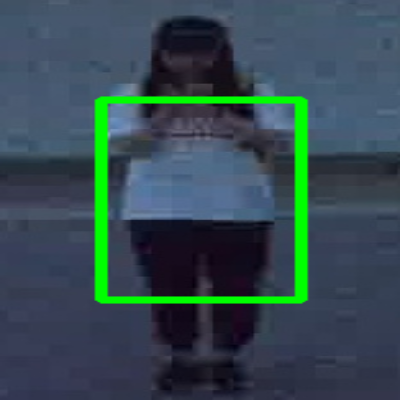

✅ Segmentation result:


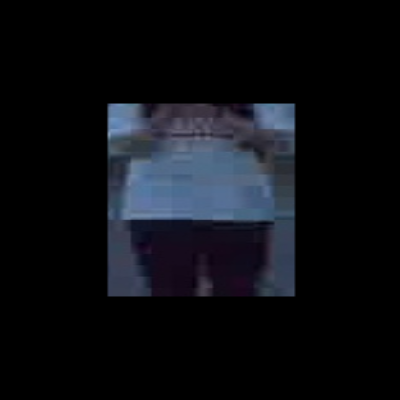

In [8]:

import cv2
import numpy as np
import torch
import torch.nn as nn
from torchvision.models import resnet50, ResNet50_Weights
from google.colab.patches import cv2_imshow
from google.colab import files
import os

class HumanDetectorCNN:
    def __init__(self, confidence_threshold=0.5, device='cuda'):
        self.confidence_threshold = confidence_threshold
        self.device = torch.device(device if torch.cuda.is_available() else 'cpu')
        self.model = self._load_detection_model()

    def _load_detection_model(self):
        model = HumanDetectionNet()
        model.to(self.device)
        model.eval()
        return model

    def detect_humans(self, frame)
        h, w, _ = frame.shape
        bbox = (w // 4, h // 4, w // 2, h // 2)
        return [bbox]

    def segment_human(self, frame, bbox):
        mask = self._apply_grabcut_segmentation(frame, bbox)
        segmented = cv2.bitwise_and(frame, frame, mask=mask)
        return segmented

    def _apply_grabcut_segmentation(self, frame, bbox):
        mask = np.zeros(frame.shape[:2], np.uint8)
        bgd_model = np.zeros((1, 65), np.float64)
        fgd_model = np.zeros((1, 65), np.float64)
        cv2.grabCut(frame, mask, bbox, bgd_model, fgd_model, 5, cv2.GC_INIT_WITH_RECT)
        mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')
        return mask2

    def process_single_image(self, image_path):
        frame = cv2.imread('Frame03.jpg')
        if frame is None:
            print("❌ Could not read image.")
            return
        print(f"🔹 Processing: {os.path.basename(image_path)}")

        bboxes = self.detect_humans(frame)
        for bbox in bboxes:
            x, y, w, h = bbox
            cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 3)
            segmented = self.segment_human(frame, bbox)

        # Display both outputs
        print("✅ Human detection result:")
        cv2_imshow(cv2.resize(frame, (400, 400)))
        print("✅ Segmentation result:")
        cv2_imshow(cv2.resize(segmented, (400, 400)))


class HumanDetectionNet(nn.Module):
    def __init__(self):
        super(HumanDetectionNet, self).__init__()
        self.backbone = resnet50(weights=ResNet50_Weights.DEFAULT)
        self.detection_head = nn.Sequential(
            nn.Conv2d(2048, 512, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(512, 256, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(256, 5, 1)
        )

    def forward(self, x):
        features = self.backbone.conv1(x)
        features = self.backbone.bn1(features)
        features = self.backbone.relu(features)
        features = self.backbone.maxpool(features)
        features = self.backbone.layer1(features)
        features = self.backbone.layer2(features)
        features = self.backbone.layer3(features)
        features = self.backbone.layer4(features)
        detections = self.detection_head(features)
        return detections

print("📤 Please upload your image file...")
uploaded = files.upload()

# Get the uploaded filename automatically
image_path = list(uploaded.keys())[0]
print(f"✅ Image uploaded: {image_path}")

# Initialize and run detector
detector = HumanDetectorCNN(confidence_threshold=0.5, device='cuda')
detector.process_single_image(image_path)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 32.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 89.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 75.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 MB 8.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ydf 0.13.0 requires protobuf<7.0.0,>=5.29.1, but you have protobuf 4.25.8 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
grpcio-

/usr/local/lib/python3.12/dist-packages/jaxlib/plugin_support.py:71: RuntimeWarning: JAX plugin jax_cuda12_plugin version 0.7.2 is installed, but it is not compatible with the installed jaxlib version 0.7.1, so it will not be used.
  warnings.warn(


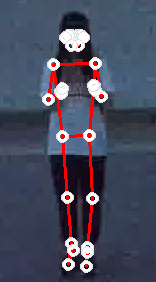

✅ Skeleton visualization complete → saved as 'skeleton_output.jpg'


In [14]:
!pip install mediapipe opencv-python -q

import cv2
import mediapipe as mp
from google.colab.patches import cv2_imshow

# --- Initialize MediaPipe Pose ---
mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils

pose = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.5)

# --- INPUT IMAGE (just change this line) ---
input_image_path = "Frame03.jpg"  # 👈 replace with your uploaded image name

# Load image
image = cv2.imread(input_image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Process with MediaPipe
results = pose.process(image_rgb)

# Draw skeleton
output_image = image.copy()
if results.pose_landmarks:
    mp_drawing.draw_landmarks(
        output_image,
        results.pose_landmarks,
        mp_pose.POSE_CONNECTIONS,
        landmark_drawing_spec=mp_drawing.DrawingSpec(color=(255,255,255), thickness=2, circle_radius=4),
        connection_drawing_spec=mp_drawing.DrawingSpec(color=(0,0,255), thickness=2, circle_radius=2)
    )

# Show and save result
cv2_imshow(output_image)
cv2.imwrite("/content/skeleton_output.jpg", output_image)
print("✅ Skeleton visualization complete → saved as 'skeleton_output.jpg'")


📂 Looking for image at: skeleton_output.jpg
✅ Keypoints extracted successfully


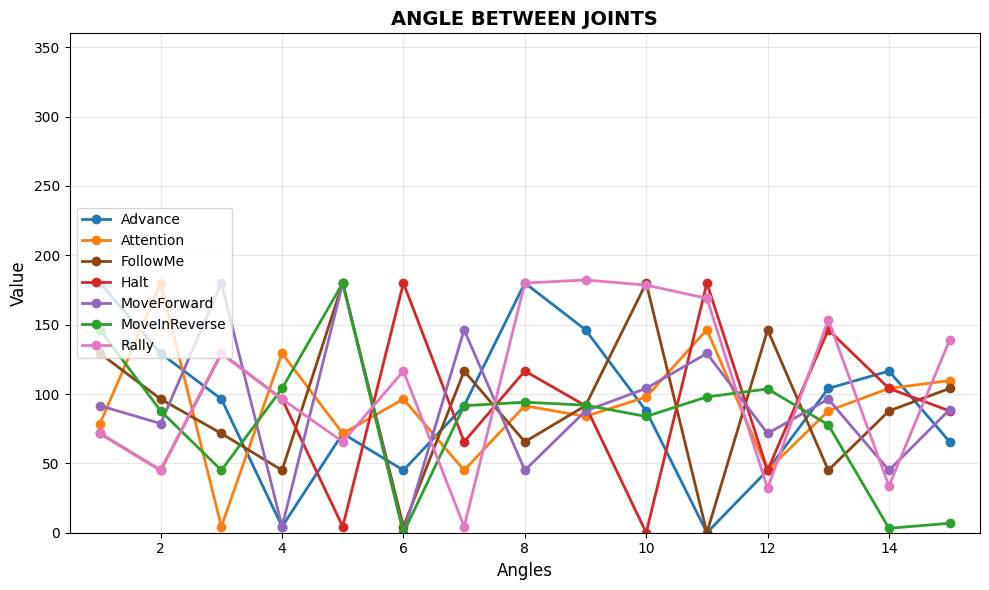

✅ Angle plot saved to: /content/angle_plot.png


In [24]:
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt
from math import atan2, degrees
import numpy as np

BODY_PARTS = {
    "Nose": 0, "Neck": 1, "RShoulder": 2, "RElbow": 3, "RWrist": 4,
    "LShoulder": 5, "LElbow": 6, "LWrist": 7, "MidHip": 8, "RHip": 9,
    "RKnee": 10, "RAnkle": 11, "LHip": 12, "LKnee": 13, "LAnkle": 14
}

ANGLE_MEASUREMENTS = {
    "Advance": [
        ("Neck", "RShoulder"), ("RShoulder", "RElbow"), ("RElbow", "RWrist"),
        ("Neck", "LShoulder"), ("LShoulder", "LElbow"), ("LElbow", "LWrist"),
        ("Neck", "MidHip"), ("MidHip", "RHip"), ("RHip", "RKnee"),
        ("RKnee", "RAnkle"), ("MidHip", "LHip"), ("LHip", "LKnee"),
        ("LKnee", "LAnkle"), ("RShoulder", "RWrist"), ("LShoulder", "LWrist")
    ],
    "Attention": [
        ("Nose", "Neck"), ("Neck", "RShoulder"), ("Neck", "LShoulder"),
        ("RShoulder", "RElbow"), ("LShoulder", "LElbow"), ("RElbow", "RWrist"),
        ("LElbow", "LWrist"), ("Neck", "MidHip"), ("RShoulder", "RHip"),
        ("LShoulder", "LHip"), ("RHip", "RKnee"), ("LHip", "LKnee"),
        ("RKnee", "RAnkle"), ("LKnee", "LAnkle"), ("MidHip", "RAnkle")
    ],
    "FollowMe": [
        ("RShoulder", "RElbow"), ("RElbow", "RWrist"), ("LShoulder", "LElbow"),
        ("LElbow", "LWrist"), ("Neck", "RShoulder"), ("Neck", "LShoulder"),
        ("RShoulder", "RWrist"), ("LShoulder", "LWrist"), ("Neck", "MidHip"),
        ("MidHip", "RHip"), ("MidHip", "LHip"), ("RHip", "RKnee"),
        ("LHip", "LKnee"), ("RKnee", "RAnkle"), ("LKnee", "LAnkle")
    ],
    "Halt": [
        ("LShoulder", "LElbow"), ("LElbow", "LWrist"), ("RShoulder", "RElbow"),
        ("RElbow", "RWrist"), ("Neck", "LShoulder"), ("Neck", "RShoulder"),
        ("LShoulder", "LWrist"), ("RShoulder", "RWrist"), ("Neck", "MidHip"),
        ("MidHip", "LHip"), ("MidHip", "RHip"), ("LHip", "LKnee"),
        ("RHip", "RKnee"), ("LKnee", "LAnkle"), ("RKnee", "RAnkle")
    ],
    "MoveForward": [
        ("Neck", "MidHip"), ("Nose", "Neck"), ("Neck", "RShoulder"),
        ("Neck", "LShoulder"), ("MidHip", "RHip"), ("MidHip", "LHip"),
        ("RHip", "RKnee"), ("LHip", "LKnee"), ("RKnee", "RAnkle"),
        ("LKnee", "LAnkle"), ("RShoulder", "RElbow"), ("LShoulder", "LElbow"),
        ("RElbow", "RWrist"), ("LElbow", "LWrist"), ("Nose", "MidHip")
    ],
    "MoveInReverse": [
        ("RHip", "RKnee"), ("RKnee", "RAnkle"), ("LHip", "LKnee"),
        ("LKnee", "LAnkle"), ("MidHip", "RHip"), ("MidHip", "LHip"),
        ("Neck", "MidHip"), ("RHip", "RAnkle"), ("LHip", "LAnkle"),
        ("RShoulder", "RHip"), ("LShoulder", "LHip"), ("Neck", "RHip"),
        ("Neck", "LHip"), ("RAnkle", "LAnkle"), ("RKnee", "LKnee")
    ],
    "Rally": [
        ("LShoulder", "LElbow"), ("LElbow", "LWrist"), ("RShoulder", "RElbow"),
        ("RElbow", "RWrist"), ("LShoulder", "LWrist"), ("RShoulder", "RWrist"),
        ("Neck", "LShoulder"), ("Neck", "RShoulder"), ("LShoulder", "RShoulder"),
        ("LElbow", "RElbow"), ("LWrist", "RWrist"), ("Neck", "LElbow"),
        ("Neck", "RElbow"), ("Neck", "LWrist"), ("Neck", "RWrist")
    ]
}

def calculate_angle(p1, p2):
    """Calculate angle using Eq. (5)"""
    x1, y1 = p1
    x2, y2 = p2
    angle = atan2(y2 - y1, x2 - x1)
    return degrees(angle) % 360

def extract_keypoints_mediapipe(image_path):
    """Extract keypoints using MediaPipe"""
    mp_pose = mp.solutions.pose
    pose = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.5)

    # Read image - fixed to use the parameter
    image = cv2.imread(image_path)
    if image is None:
        print(f"❌ Could not read image: {image_path}")
        print(f"💡 Make sure the file exists at this path")
        return None

    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = pose.process(image_rgb)

    keypoints = [None] * len(BODY_PARTS)

    if results.pose_landmarks:
        landmarks = results.pose_landmarks.landmark
        h, w = image.shape[:2]

        # MediaPipe landmark indices mapping
        mp_mapping = {
            "Nose": 0,
            "RShoulder": 12,
            "RElbow": 14,
            "RWrist": 16,
            "LShoulder": 11,
            "LElbow": 13,
            "LWrist": 15,
            "RHip": 24,
            "RKnee": 26,
            "RAnkle": 28,
            "LHip": 23,
            "LKnee": 25,
            "LAnkle": 27
        }

        # Extract keypoints
        for name, mp_idx in mp_mapping.items():
            if mp_idx < len(landmarks):
                lm = landmarks[mp_idx]
                keypoints[BODY_PARTS[name]] = (int(lm.x * w), int(lm.y * h))

        # Estimate Neck as midpoint of shoulders
        if keypoints[BODY_PARTS["LShoulder"]] and keypoints[BODY_PARTS["RShoulder"]]:
            l_sh = keypoints[BODY_PARTS["LShoulder"]]
            r_sh = keypoints[BODY_PARTS["RShoulder"]]
            keypoints[BODY_PARTS["Neck"]] = ((l_sh[0] + r_sh[0]) // 2, (l_sh[1] + r_sh[1]) // 2)

        # Estimate MidHip as midpoint of hips
        if keypoints[BODY_PARTS["LHip"]] and keypoints[BODY_PARTS["RHip"]]:
            l_hip = keypoints[BODY_PARTS["LHip"]]
            r_hip = keypoints[BODY_PARTS["RHip"]]
            keypoints[BODY_PARTS["MidHip"]] = ((l_hip[0] + r_hip[0]) // 2, (l_hip[1] + r_hip[1]) // 2)

        print("✅ Keypoints extracted successfully")
        return keypoints
    else:
        print("❌ No pose detected in image")
        return None

def calculate_angles_from_measurements(keypoints):
    """Calculate 15 angle measurements for each movement state"""
    angles_data = {state: [] for state in ANGLE_MEASUREMENTS.keys()}

    for state, measurements in ANGLE_MEASUREMENTS.items():
        for part1, part2 in measurements:
            id1, id2 = BODY_PARTS[part1], BODY_PARTS[part2]
            if keypoints[id1] and keypoints[id2]:
                angle = calculate_angle(keypoints[id1], keypoints[id2])
                angles_data[state].append(angle)
            else:
                # Use a default value if keypoint missing
                angles_data[state].append(np.nan)

    return angles_data

def plot_angle_graph(angles_data, output_path="angle_plot.png"):
    """Generate the angle plot"""
    plt.figure(figsize=(10, 6))

    colors = {
        "Advance": "#1f77b4",
        "Attention": "#ff7f0e",
        "FollowMe": "#8B4513",
        "Halt": "#d62728",
        "MoveForward": "#9467bd",
        "MoveInReverse": "#2ca02c",
        "Rally": "#e377c2"
    }

    for state, angles in angles_data.items():
        if angles:
            x = range(1, len(angles) + 1)
            plt.plot(x, angles, marker='o', markersize=6,
                    label=state, color=colors[state], linewidth=2)

    plt.xlabel("Angles", fontsize=12)
    plt.ylabel("Value", fontsize=12)
    plt.title("ANGLE BETWEEN JOINTS", fontsize=14, fontweight='bold')
    plt.ylim(0, 360)
    plt.xlim(0.5, 15.5)
    plt.grid(True, alpha=0.3)
    plt.legend(loc='center left', fontsize=10)
    plt.tight_layout()

    plt.savefig(output_path, dpi=300, bbox_inches='tight')
    plt.show()
    print(f"✅ Angle plot saved to: {output_path}")

# ---------------- MAIN EXECUTION ----------------
if __name__ == "__main__":
    # 👇 CHANGE THIS TO YOUR IMAGE PATH
    input_image = "skeleton_output.jpg"  # Update this path!

    print(f"📂 Looking for image at: {input_image}")

    # Extract keypoints
    keypoints = extract_keypoints_mediapipe(input_image)

    if keypoints:
        # Calculate angles
        angles = calculate_angles_from_measurements(keypoints)

        # Plot and save
        plot_angle_graph(angles, output_path="/content/angle_plot.png")
    else:
        print("❌ Failed to process image")
        print("💡 Tips:")
        print("   1. Upload your image to Colab")
        print("   2. Update 'input_image' variable with correct path")
        print("   3. Make sure image contains a clear human pose")

In [26]:
!pip install --upgrade --force-reinstall numpy scipy matplotlib opencv-python


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.3/112.3 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.7/35.7 MB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 80.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 MB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 101.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.6/362.6 kB 20.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 64.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 55.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.5/66.5 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 

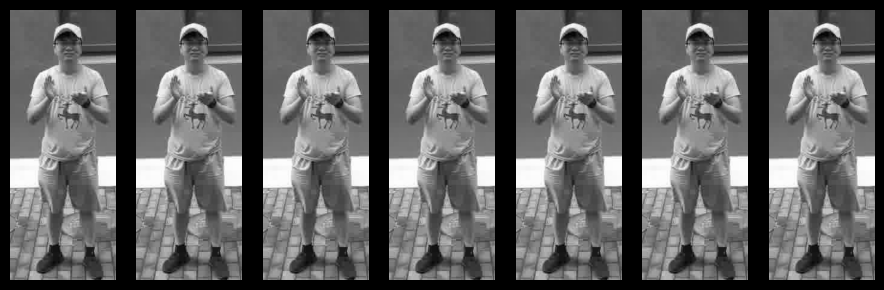

In [5]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load your image (save your mask as 'image.jpg' beforehand)
img = cv2.imread('Frame04.jpg', 0)

# Threshold to get binary mask (if not already binary)
_, mask = cv2.threshold(img, 127, 1, cv2.THRESH_BINARY)

# Find center of mask for starting point
coords = np.column_stack(np.where(mask))
center = coords.mean(axis=0).astype(int)

height, width = mask.shape
geodesic = np.full((height, width), np.inf)
geodesic[center[0], center[1]] = 0
visited = np.zeros_like(mask, dtype=bool)
queue = [(0, center[0], center[1])]

# Geodesic propagation, similar to Dijkstra/FMA
while queue:
    queue.sort()
    d, x, y = queue.pop(0)
    if visited[x, y]: continue
    visited[x, y] = True
    for dx, dy in [(-1,0),(1,0),(0,-1),(0,1)]:
        nx, ny = x+dx, y+dy
        if 0 <= nx < height and 0 <= ny < width:
            if mask[nx, ny] and not visited[nx, ny]:
                new_d = d + np.linalg.norm([dx, dy])
                if new_d < geodesic[nx, ny]:
                    geodesic[nx, ny] = new_d
                    queue.append((new_d, nx, ny))

# Plotting with fitted ellipses at chosen radii
dist_levels = np.linspace(0, np.percentile(geodesic[geodesic < np.inf], 90), 8)[1:]

plt.figure(figsize=(9,3))
for i, lvl in enumerate(dist_levels):
    plt.subplot(1, len(dist_levels), i+1)
    mask_lvl = ((geodesic > lvl-3) & (geodesic < lvl+3)).astype(np.uint8)
    contours, _ = cv2.findContours(mask_lvl, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    out_rgb = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
    for cnt in contours:
        if len(cnt) >= 5:
            ellipse = cv2.fitEllipse(cnt)
            color = (255,255,0) if i % 2 == 0 else (0,0,255) # yellow/blue
            cv2.ellipse(out_rgb, ellipse, color, 2)
    plt.axis('off')
    plt.imshow(out_rgb)
plt.tight_layout()
plt.show()


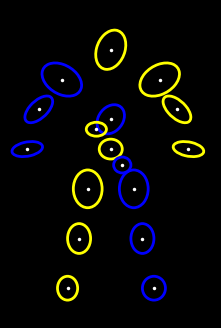

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Set the dark background globally
plt.style.use('dark_background')

# Example compact skeleton keypoints with ellipse parameters [(y, x, height, width, angle)]
keypoints = [
    (40, 45, 20, 10, 10),   # Head
    (55, 28, 12, 18, 60),   # Left shoulder
    (55, 62, 12, 18, -60),  # Right shoulder
    (70, 20, 15, 7, 30),    # Left elbow
    (70, 68, 15, 7, -30),   # Right elbow
    (90, 16, 11, 7, 70),    # Left wrist
    (90, 72, 11, 7, -70),   # Right wrist
    (75, 45, 15, 9, 15),    # Upper chest
    (110, 37, 19, 10, 0),   # Left hip
    (110, 53, 19, 10, 0),   # Right hip
    (135, 34, 15, 8, 0),    # Left knee
    (135, 56, 15, 8, 0),    # Right knee
    (160, 30, 12, 7, 0),    # Left ankle
    (160, 60, 12, 8, 0),    # Right ankle
    (90, 45, 10, 8, 0),     # Mid-torso
    (98, 49, 8, 6, 0),      # Low-torso
    (80, 40, 7, 7, 0),      # Center
]

fig, ax = plt.subplots(figsize=(2.6, 4))
ax.set_facecolor('black')
plt.xlim(10, 80)
plt.ylim(175, 20)  # inverted y for upright figure
ax.axis('off')

for i, (y, x, h, w, angle) in enumerate(keypoints):
    color = 'yellow' if i % 2 == 0 else 'blue'
    ellipse = plt.matplotlib.patches.Ellipse(
        (x, y), w, h, angle=angle, fill=False, lw=2, color=color
    )
    ax.add_patch(ellipse)
    ax.plot(x, y, 'w.', markersize=5, markeredgewidth=0)

plt.savefig('Frame04.png', dpi=175, bbox_inches='tight', pad_inches=0, facecolor='black')
plt.show()
